<a href="https://colab.research.google.com/github/pui-sum-rv/lab1/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1 - Introduction to Jupyter notebooks, Google Colab, Basic Image Manipulation, and Color Spaces

These laboratory excersises are solved on Google Colab and are save on GitHub repo that is connected to GitHub Classroom.

## Tools You need to use to Submit Assignments

In this document, you will solve tasks. This is a Jupyter Notebook which has the **.ipynb** extension, is an interactive web environment for data analysis, visualization, solution presentations, education, and more.

**Google Colab** is a tool that allows you to run and share Jupyter Notebook files on Google's servers, including the use of Google's CPU, GPU, and TPU resources. Colab is like Google Docs for Jupyter Notebooks. **Google Colab does not automatically save your assignment to GitHub.**

**You use GitHub to save and submit your assignments.** When you accept the assignment through GitHub Classroom, a repository is automatically created on your GitHub account with a copy of the task. This is where you will save your solutions. Saving your solutions submits the tasks for that lab.

## How to Solve the Tasks?
1. Accept the task via the Google Classroom link that you will receive. Google Classroom will create a repository on your account.
2. Go to the newly created repository on your account and click on the .ipynb file, then click Open in Colab.
3. You will solve the tasks in Google Colab.

## How to Save (Submit) Tasks?

1. In Google Colab, click on the Open settings gear icon in the top-right corner.
2. Click on the GitHub tab and check the box for Access private repositories and organizations.
3. A new window will open for you to grant access to GitHub. For ferit-osirv, click Grant.
4. Save and exit the settings.
5. Click on File > Save a copy in GitHub.
6. Select the lab repository that includes your name.

> *Note:* You only need to complete steps 1-4 the first time.

7. Click on **File > Save a copy in GitHub**.
8. Select created repository **that has your name in it**.

# Introduction to Jupyter Notebook

A Jupyter Notebook consists of two types of cells: text and code. You are currently reading a text cell, which can contain text, markdown, or HTML. It is useful for adding more information about your code, allowing the notebook to be read as a narrative, which is where the name Jupyter Notebook comes from.

Code cells contain Python code or command-line commands.

In [19]:
text = "You write your code in code block like this one"
# These code cells will always display the result of the last line of code below the cell.
text

'You write your code in code block like this one'

You can execute code cells by selecting them with your mouse and pressing the play button in the upper left corner of the cell. You can also run the cell and move to the next one with the shortcut **Shift+Enter**. **Control+Enter** will execute the current cell and keep it selected.

The output of code cells appears below the cell. It can include outputs from ,print statements, as well as graphs and images generated using libraries like OpenCV or matplotlib.

Additionally, the result of the last line of code is always displayed at the end of the output.

Feel free to experiment with the code cells and modify this notebook however you like!

**For more tips** check out the following notebook: https://colab.research.google.com/notebooks/basic_features_overview.ipynb


## Order of execution

It's important to remember that cells are executed in the order in which you run them. For example, take a look at the following 3 cells:

In [20]:
a = 3 # Block 1

In [21]:
a = 2 # Block 2

In [22]:
a # Block 3

2

Try running cell 2 first, then cell 1, and finally cell 3. You will notice that the output of cell 3 changes because cell 1 was executed and a was assigned a new value. This behavior can lead to bugs in your code. Therefore, it is good practice to periodically, and especially before submission, run all cells in order again. You can do this by clicking ***Runtime > Run** all or pressing F9.

## Importing libraries

For completing lab exercises, you'll need various libraries such as numpy, OpenCV, matplotlib, etc. It's good practice to have a separate cell for importing all the required libraries at the beginning of the notebook. Example:


In [23]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plot

This way, you ensure that the cell is always executed, and all the necessary libraries are loaded. Additionally, once these libraries are loaded, Google Colab will provide suggestions (auto-complete) as you type, which will significantly ease your work.

## Copying Files from the GitHub Repository

For completing the exercises, you will need images and other files that will be stored in the GitHub repository of the exercise. A command like this will be available in the notebook for each exercise. It will copy the files from GitHub to the Google Colab environment.

**You need to run this command before starting each exercise.**

In [24]:
!rm -rf clone && git clone https://github.com/pui-sum-rv/lab1 clone && cp -a clone/. .

Cloning into 'clone'...
remote: Enumerating objects: 110, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 110 (delta 34), reused 80 (delta 19), pack-reused 0 (from 0)
Receiving objects: 100% (110/110), 6.53 MiB | 21.69 MiB/s, done.
Resolving deltas: 100% (34/34), done.


**Google Colab will occasionally delete all files**. Therefore, you might need to rerun this command between sessions. If you encounter errors indicating that files do not exist, try running the command again.

# Digital Image Processing vs. Computer Vision

To begin with, Computer Graphics creates a mathematical or geometric model from an original captured image to produce a digital image. However, it's important not to confuse this with Digital Image Processing or the field of Computer Vision, even though they complement each other. Digital Image Processing results in a modified version of the image, whereas Computer Vision provides a meaningful interpretation of the image using Artificial Intelligence techniques.

Nevertheless, to sucessfully deal with Computer Vision, we need to know some stuff from Image Processing field.

## So, how we digitize an image?
Simply put, the process of sampling (digitizing coordinate values of
) + quantization (digitizing amplitude values
) will generate an digital image
, where the function represents intesity / gray level and the coordinate represents picture element (known as pixel).

![digitizing](https://i.postimg.cc/G2r5cPg3/digitizing.png)

Therefore, the digital image can be simply coded in a matrix form as:


\begin{bmatrix} f(0, 0) & f(0, 1) & ... & f(0, N-1) \\ f(1, 0) & f(1, 1) & ... & f(1, N-1) \\ \vdots & \vdots & \ddots & \vdots \\ f(M-1, 0) & f(M-1, 1) & ... & f(M-1, N-1) \end{bmatrix}

where M is number of rows and N is number of columns. Since we'll use Python, the pixel starts from (0,0) and ends in (M-1, N-1).

## Bits Required for Digital Image Storage

Number of gray levels ($L$) allowed in each pixel formulated as $L = 2^k \iff k = \frac{ln(L)}{ln(2)}$, where $k$ denotes a bit (binary digit). Therefore, a ***k-bit image*** requires $N \times M \times k$ bits to store a digitized image. If in case $M == N$ (height and weight of pixel are the same), its formula can be simplified as $N^2 \times k$. For example, an image with
**L = 256 possible gray-level values** is called an $2^k = 2^8 = $ **8-bit** image; and if this 8-bit image has 32x32 dimension thus it'll need $32 \times 32 \times 8 = 8,912$ bit or equivalent to **1,024 byte = 1 KB** (remember: 8 bit = 1 byte and 1,024 byte = 1 kilobyte / KB).

## Image Aquisition and Image Loading

Image acquisition process can be as simple as image capturing (e.g. with camera), loading, and saving.

TO BE NOTICED
* **matplotlib.pyplot** represents **<font color="red">R</font><font color="limegreen">G</font><font color="blue">B</font>** image
* **cv2** represents **<font color="blue">B</font><font color="limegreen">G</font><font color="red">R</font>** image (reversed)

Therefore, if you want to use **cv.imread()** to load an image and **plt.imshow()** to show it, convert the image first.
<br>Otherwise, the use of **cv2.imshow()** will open a new window to show up an image (rather than directly showed on your IPYNB cell).

First lets import necesary libraries.

In [25]:
import cv2
from imutils import resize
from numpy.random import uniform as un
from numpy import float32, uint8, array, arange, ones, amax, sqrt, concatenate, pi, cos, sin
from matplotlib import pyplot as plt

Lets load an image. First, we will write the function for image loading and showing.

In [26]:
def plot_image(img, title=None, font_size=None, axis="off", color=cv2.COLOR_BGR2RGB): # since CV2 uses BGR image, convert BGR to RGB
    plt.title(title, fontsize=font_size) # plot figure name/title
    plt.axis(axis) # "off" == remove pyplot axes

    """
    You DO NOT NEED the if-else configuration below IF you're using OPENCV v4.0. or above.
    Simply do plt.imshow(cv2.cvtColor(img, color)) for either BGR or grayscale image.
    """

    if len(img.shape) == 3: # means it has 3-channels color
        plt.imshow(cv2.cvtColor(img, color))
    else: # for 1-channel image
        plt.imshow(img, cmap="gray")

After that we will call that function and use it to read an image, convert it to grayscale image and then we will convert grayscale image to binary image (image that contains only black and white pixels).

In [29]:
# Original Image
img = cv2.imread("images/airplane.bmp") # cv2.imread("path", cv2.IMREAD_COLOR(default)|cv2.IMREAD_GRAYSCALE(0)|cv2.IMREAD_UNCHANGED(-1))

# Grayscale Image
img_grayscaled = cv2.imread("images/airplane.bmp", 0) # or cv2.imread("img/lena.png". cv2.IMREAD_GRAYSCALE)
# img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Binary Image (MUST BE from Grayscale Image)
_, img_binary = cv2.threshold(img_grayscaled, 127, 255, cv2.THRESH_BINARY) # grayscale (NOT RGB) -> binary image

Now lets show those images:

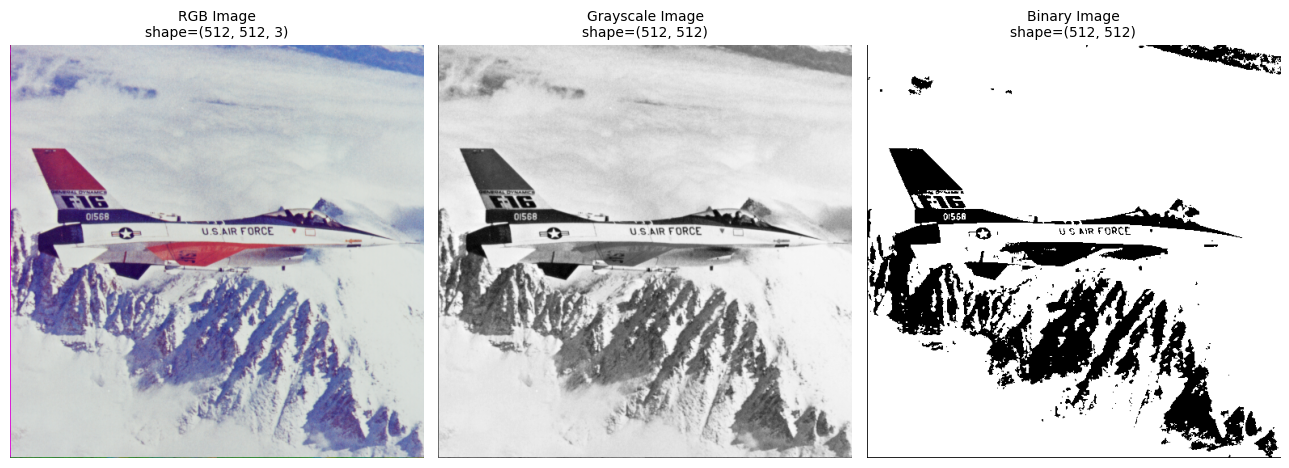

In [30]:
origin_fig_names = [
    "RGB Image\nshape={}".format(img.shape),
    "Grayscale Image\nshape={}".format(img_grayscaled.shape),
    "Binary Image\nshape={}".format(img_binary.shape)
] # will be set as title for each image

origin_fig = plt.figure(figsize=(13, 5)) # figsize(width/horizontally, height/vertically)
origin_img = [img, img_grayscaled, img_binary]

for i in range(len(origin_img)):
    x = origin_fig.add_subplot(1, 3, i+1) # position index always starts from 1, thus i+1
    plot_image(origin_img[i], title=origin_fig_names[i])
plt.tight_layout() # margin adjusted

And finally, lets write them to directory: /content/slike

In [31]:
cv2.imwrite("img/lena.png", img) # cv2.imwrite("path/name.ext", your_img)

False

# Tasks about Image Manipulation

In these exercises, you will familiarize yourself with the basics of image manipulation in Python.

## Tasks

Solve the following tasks within this Jupyter Notebook, ensuring that the result of each task is displayed below the respective code cell. **Add at least one code cell for each task.**


1. Write a program that loads an image and displays three separate images, one for each channel. (Hint: When displaying one channel, set the other two channels to 0)

2. Write a program that loads an image and creates a border of 10 pixels around the image. Display the resulting image.

3. Write a program that loads an image and creates three new images from it. The first should have half the vertical pixels (rows) of the original, the second should have half the horizontal pixels (columns), and the third should have half of both. (Hint: take every other pixel). Display all three images.


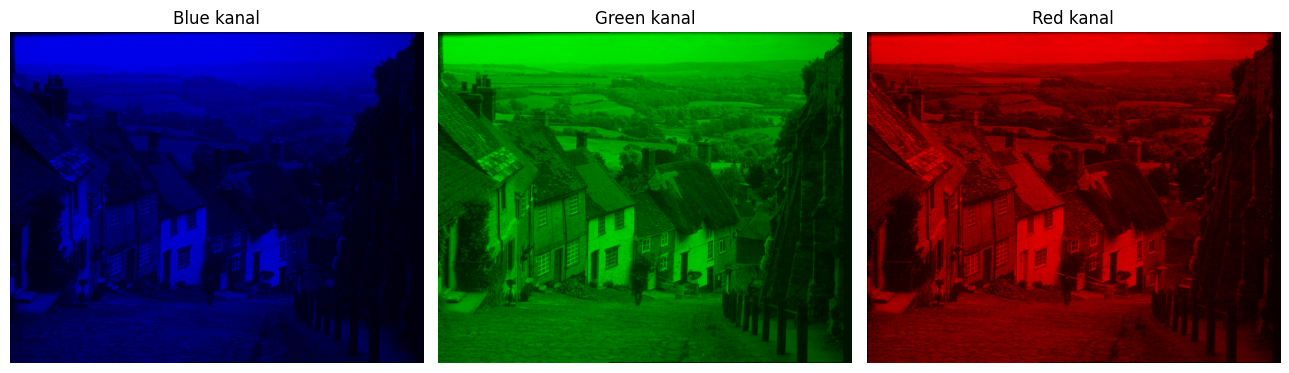

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot_image(img, title="", axis="off"):
    plt.title(title)
    plt.axis(axis)
    if img.ndim == 3:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap="gray")

# 1. Učitavanje slike
img = cv2.imread("images/goldhill.bmp")  # promijeni putanju ako treba
if img is None:
    raise FileNotFoundError("Slika nije pronađena!")

# 2. Razdvajanje kanala
b, g, r = cv2.split(img)
zeros = np.zeros_like(b)

# 3. Stvaranje slika s jednim aktivnim kanalom
img_b = cv2.merge([b, zeros, zeros])
img_g = cv2.merge([zeros, g, zeros])
img_r = cv2.merge([zeros, zeros, r])

# 4. Prikaz
plt.figure(figsize=(13, 4))
plt.subplot(1,3,1); plot_image(img_b, "Blue kanal")
plt.subplot(1,3,2); plot_image(img_g, "Green kanal")
plt.subplot(1,3,3); plot_image(img_r, "Red kanal")
plt.tight_layout(); plt.show()


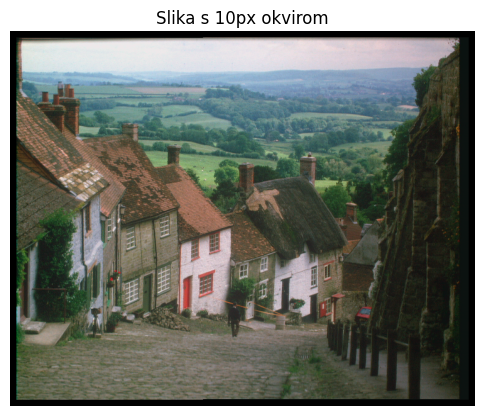

In [37]:
# Učitavanje iste slike
img = cv2.imread("images/goldhill.bmp")
if img is None:
    raise FileNotFoundError("Slika nije pronađena!")

# 1. Stvaranje okvira od 10 piksela (crni)
bordered = cv2.copyMakeBorder(
    img, 10, 10, 10, 10,
    borderType=cv2.BORDER_CONSTANT,
    value=[0, 0, 0]  # crni okvir
)

# 2. Prikaz slike
plt.figure(figsize=(6,6))
plot_image(bordered, "Slika s 10px okvirom")
plt.show()


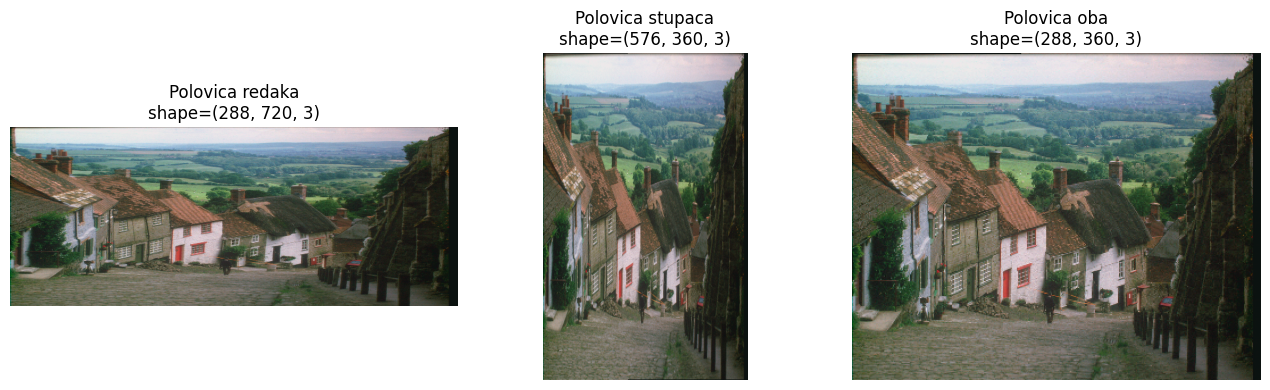

In [38]:
# Učitavanje slike
img = cv2.imread("images/goldhill.bmp")
if img is None:
    raise FileNotFoundError("Slika nije pronađena!")

# 1. Polovica redaka (svaki drugi red)
half_rows = img[::2, :, :]

# 2. Polovica stupaca (svaki drugi stupac)
half_cols = img[:, ::2, :]

# 3. Polovica redaka i stupaca
half_both = img[::2, ::2, :]

# 4. Prikaz sve tri slike
plt.figure(figsize=(13,4))
plt.subplot(1,3,1); plot_image(half_rows, f"Polovica redaka\nshape={half_rows.shape}")
plt.subplot(1,3,2); plot_image(half_cols, f"Polovica stupaca\nshape={half_cols.shape}")
plt.subplot(1,3,3); plot_image(half_both, f"Polovica oba\nshape={half_both.shape}")
plt.tight_layout(); plt.show()


# Color spaces

In this lab, you'll get familiar with image color spaces. On the web and in general usage, most images are encoded as **RGB**: **R**ed, **G**reen, and **B**lue. OpenCV generally uses **BGR**: Blue, Green, Red.

This is just one of the many ways we can represent an image. In an RGB image, we get a pixel by mixing the three colors. We can get the same pixel by using different numbers and formulae to combine them. For instance, the **CMYK** color space encodes each pixel in 4 primary colors: **C**yan, **M**agenta, **Y**ellow and **K**ey (Black). Since printers use these primary colors, CMYK is often used when preparing images for print.

Not all color spaces consist only of primary colors. For instance, **HSV** (**H**ue, **S**aturation, **V**alue) stores the color in Hue, the color's intensity in Saturation, and the general brightness of that pixel in Value. The Hue portion is a number in [0, 179] (in OpenCV, usually it's an arc around a circle, so [0, 360)) where 0 is red, and the hue slowly shifts to green and then blue as you get to higher numbers.

![hsv](https://i.postimg.cc/XqdVJn2Y/rgb-to-hsv.jpg)

You can think of the whole HSV color space as a cylinder. The height on the cylinder corresponds to how dark the pixel is, the distance from the center tells you how non-gray it is, and the angle tells you which color the pixel is.

There are many color spaces each with its uses. One other color space we'll mention in **YCbCr**. Y is the **luma** component, similar to the Value in HSV. Cb is the **blue-difference chroma component**, i.e. how blue should this pixel be tinted. Similarly, Cr is the **red-difference chroma component**, which tells you how much should a pixel be tinted red. Even with a different type of representation, each YCbCr is capable of showing all RGB images.

![ycbc](https://i.postimg.cc/w38tBfgD/rgb-to-ycrcb.png)

The reason YCbCr is important is because of the human eye. Our eyes are much more sensitive to luminance than actual color differences. Therefore, when compressing images, it's better to compress the chroma components than luminance if you want the image to look the same to a human observer.  This is called **chroma subsampling** and is used heavily in image and video compression, including MPEG, JPEG, DVD and Blu-Rays, and many others.

## In OpenCV

OpenCV supports a plethora of color spaces for images. The main function to convert color spaces is: [img = cv.cvtColor(img, code)](https://docs.opencv.org/master/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab). The `code` tells OpenCV **from** which format to convert the image, as well as **to** which format. You can see all the color conversion codes [here](https://docs.opencv.org/master/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0). For example:

- cv.COLOR_BGR2YCrCb (BGR to YCbCr)
- cv.COLOR_YCrCb2BGR (back to BGR as the name suggests)
- cv.COLOR_RGB2HSV
- etc.

Note: You'll have to convert the image back to RGB if you want to use matplotlib to display it in its original form.

# Tasks about Color spaces
In these exercises, you will familiarize yourself with the basics of different color spaces.

## Task 1

Load the image `images/peppers.png` using OpenCV and convert it to the HSV color space using the aforementioned function. Then, add 30 to the H (hue) channel of the HSV image for each pixel. Convert that image back to RGB and display it.

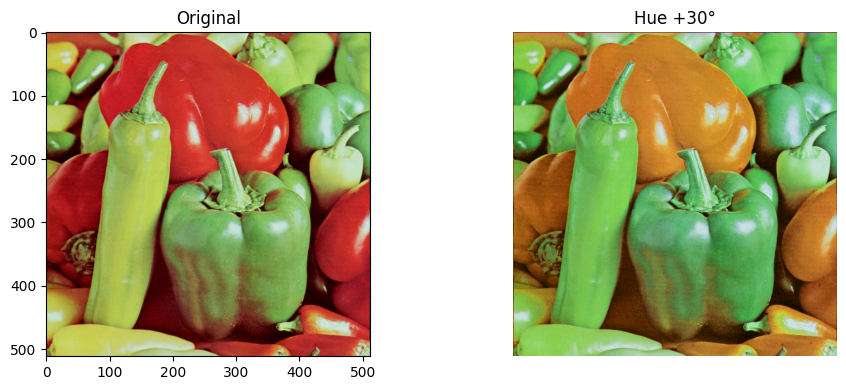

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ Učitavanje slike
img = cv2.imread("images/pepper.bmp")
if img is None:
    raise FileNotFoundError("Slika 'images/pepper.bmp' nije pronađena!")

# 2️⃣ Pretvorba u HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 3️⃣ Dodaj +30° na hue kanal (OpenCV raspon 0–179 → 30° = +15)
hsv[:, :, 0] = (hsv[:, :, 0].astype(int) + 15) % 180
hsv = hsv.astype(np.uint8)

# 4️⃣ Pretvorba natrag u BGR
shifted = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

# 5️⃣ Prikaz rezultata
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(shifted, cv2.COLOR_BGR2RGB))
plt.title("Hue +30°")

plt.axis("off")
plt.tight_layout()
plt.show()


## Task 2

Load the image `images/peppers.png` using OpenCV and convert it to the HSV color space using the aforementioned function. Then, set the H (hue) channel of the HSV image to 0 for each pixel. Convert that image back to RGB and display it.

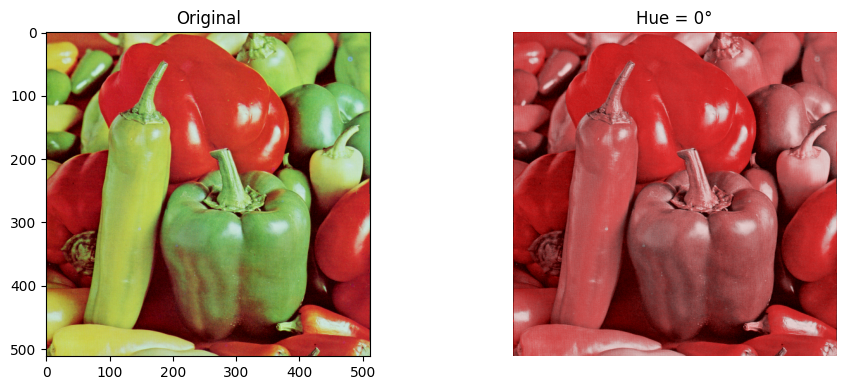

In [43]:
import cv2
import matplotlib.pyplot as plt

# 1️⃣ Učitavanje slike
img = cv2.imread("images/pepper.bmp")
if img is None:
    raise FileNotFoundError("Slika 'images/pepper.bmp' nije pronađena!")

# 2️⃣ Pretvorba u HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 3️⃣ Postavi H kanal na 0 (crvena nijansa)
hsv[:, :, 0] = 0

# 4️⃣ Pretvori natrag u BGR
hue0 = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

# 5️⃣ Prikaz rezultata
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(hue0, cv2.COLOR_BGR2RGB))
plt.title("Hue = 0°")

plt.axis("off")
plt.tight_layout()
plt.show()
